# New Book Adaptable Code tro generate plots

In [86]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase


import seaborn as sns
import sqlite3

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
df_folder = '../../data/'
db_path = 'YTD_Game_Stats_Cleaned.db'

### Load the Data
- Current and Previous year's Roster
- Game Details Database for current year

In [87]:
## Load rosters into dataframes
df_current = pd.read_csv(data_folder + roster_path_current)
df_previous = pd.read_csv(data_folder + roster_path_previous)

## Connect to the Database
conn = sqlite3.connect(df_folder + db_path)

#### UNCHECK TO CHECK DATABASE CONTENTS
# ## List the tables in the database
# tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
# print(tables)


# Set Parameters for the charts
- Team Names
- Team Logos
- Background Image
- Transparentcy of the background
- Figure Size
- Font Styles
    - Once I nail down a style I am happy with I want to store this in a seperate file and import


In [88]:
## Set paramaeters

## Teams to Highlight - Use dashes instead of spaces
team_1 = 'Michigan State' # 
team_1_abrv = 'MSU' #
team_2 = 'Ohio State' #
team_2_abrv = 'OSU' #

## Path to School Logos
team_1_logo =  'msu.png' #
team_2_logo =  'osu.png' #
team_logos = {team_1: logo_folder + team_1_logo, team_2: logo_folder + team_2_logo}

## Set Colors
team_1_color =  'darkgreen' # For Michigan State
team_2_color =  'darkred' # For Ohio State
team_colors = {team_1: team_1_color, team_2: team_2_color}
############ Eventaully want to create a dictionary of colors for each team and save in a file to import

team_abrv_mapping = {
    'Michigan State': 'MSU',
    'Ohio State': 'OSU'
}


### Create a disctionary called highlight_colors to store the colors for each team
### Do it this way so i can reuse code from MSU_Explore_and_Plot notebook
highlight_colors = {team_1_abrv: team_1_color, team_2_abrv: team_2_color}

#### Set Background Image
path_to_bg_image =  'msu_osu_1.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)



# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (12, 8) # Original
fig_deafult_2 = (12, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
# figure_size = fig_deafult_1
figure_size = fig_deafult_2


################################
## FONT PARAMETERES
font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 28}
font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}
#################################





## HELPER FUNCTIONS

In [89]:
    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

# Physical Comparison Charts
- Compound box and whisker plots of Height & Weight both by Position and Class Rank

In [90]:
### Set the Output Folder for the images
TEMP_FOLDER = '../../TEMP/'

# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# Set the order of Class Rank
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # Create a filtered dataframe for Two Schools We want to highlight
df_filtered = df_current[(df_current['School'] == team_1) | (df_current['School'] == team_2)]


########### Create the Plots ###########
def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
    # Create subplot
    fig, ax = plt.subplots(1, 1, figsize=figure_size)
    
    # Set Axis ranges
    ax.set_xlim([0, len(x_order)])

    # Background Image
    x_range = ax.get_xlim()
    y_min = df[y_col].min()
    y_max = df[y_col].max()
    ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

    # Plots
    sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
    sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
    sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=3)

    # Titles and Labels
    ax.set_title(title, fontdict=font_title_param)
    ax.set_ylabel(y_label, fontdict=font_label_param)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
    ax.set_xlabel('')

    ########## Conver the tick marks to feet and inches in the Height Plots ##########
    # Check if y_col is for height and then apply the conversion
    if y_col == 'Height_Inches':
        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
    # Get upper bounds of the axis
    x_max = ax.get_xlim()[1]
    y_max = ax.get_ylim()[1]

    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner


    # # # Drop Legend
    ax.get_legend().remove()

    plt.tight_layout()
    
    # Save Plot
    plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

# # Weight by Class Rank:
# generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Class Rank:
# generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Weight by Position:
# generate_plot('Position', 'Wt.', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Position:
# generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



# Statistical Plots
- Scatter plots for Goals, Assist, PIMs and Shots

- 

## Helper Functions

### Query Definitions to be usesd in plots below

In [91]:
# Query to get the average goals scored and allowed per game for each team
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)


In [92]:

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.15, zorder=100):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5), zorder=zorder)
    ax.add_artist(ab)

# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax):
        
    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = df[df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = df[df['Team'] == team_abrv_mapping[team]]
        
        if not team_data.empty:
            x, y = team_data[x_col].values[0], team_data[y_col].values[0]
            
            if team in logo_mapping:
                logo_img = mpimg.imread(logo_folder + logo_mapping[team])
                plot_logo(logo_img, x, y, ax)
            else:
                plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')
        else:
            print(f"No data found for team {team}")


# Dictionary to map team names to their logo filenames
logo_mapping = {
    'Michigan State': 'msu.png',
    'Ohio State': 'osu.png'
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


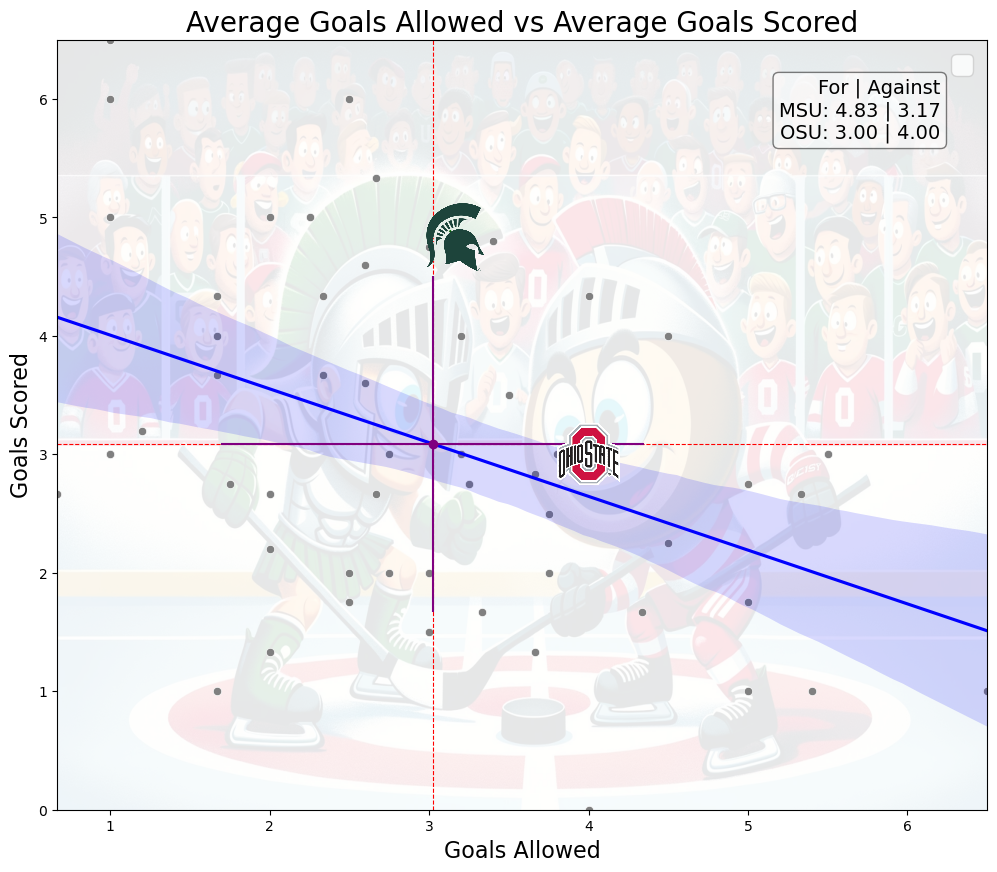

In [93]:

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)

# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()


# Create the scatter plot with trend line, average, and standard deviation
fig, ax = plt.subplots(figsize=figure_size)  # Create a figure and a set of subplots, and get the Axes object.



# Set the background image
# You might need to adjust the extent based on your data's min and max values
plt.imshow(bg_img, aspect='auto', extent=[avg_goals_df['Avg_Goals_Allowed'].min(), 
                                          avg_goals_df['Avg_Goals_Allowed'].max(), 
                                          avg_goals_df['Avg_Goals_Scored'].min(), 
                                          avg_goals_df['Avg_Goals_Scored'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)



# Scatter plot
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey')

# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x')

plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99)


# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=ax)



###########################
# Add a legend-like floating box in the upper right
# Create a multi-line summary text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Goals_Scored"].values[0]:.2f} | {team_data["Avg_Goals_Allowed"].values[0]:.2f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Average Goals Allowed vs Average Goals Scored', fontsize=20)
plt.xlabel('Goals Allowed', fontsize=16)
plt.ylabel('Goals Scored', fontsize=16)

# Upsize the Legend Text
plt.legend(fontsize=20)

plt.show()

## Average Shots Per Game (for and Against)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


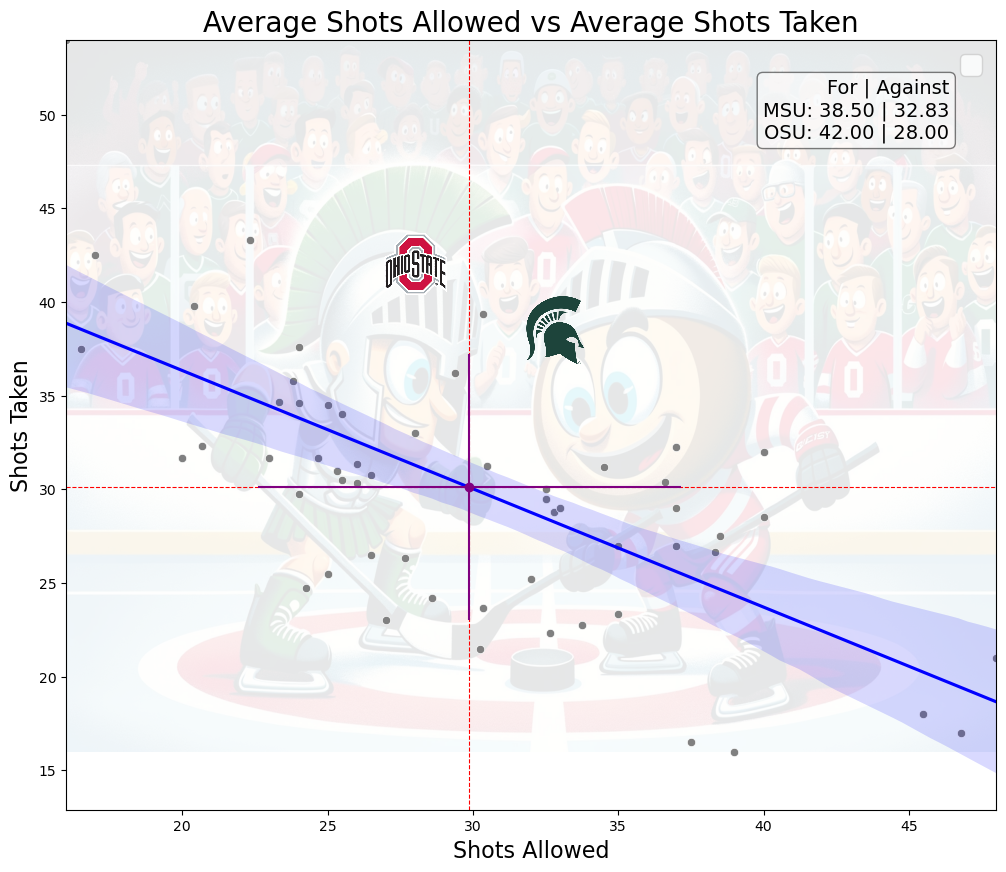

In [94]:
# Query to get the average shots taken and allowed per game for each team using the previous database connection
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()

# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)

# Set the background image
plt.imshow(bg_img, aspect='auto', extent=[avg_shots_df['Avg_Shots_Allowed'].min(), 
                                          avg_shots_df['Avg_Shots_Allowed'].max(), 
                                          avg_shots_df['Avg_Shots_Taken'].min(), 
                                          avg_shots_df['Avg_Shots_Taken'].max()], 
           zorder=0, alpha=alpha_value)


# Scatter plot
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey')

# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')



# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        plt.scatter(team_data['Avg_Shots_Allowed'], team_data['Avg_Shots_Taken'], color=color, s=100, zorder=5, marker='x', label=f"{team}")


# Add logos
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=ax)

# Add a legend-like floating box in the upper right
# Create a multi-line summary text

# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Shots_Taken"].values[0]:.2f} | {team_data["Avg_Shots_Allowed"].values[0]:.2f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Average Shots Allowed vs Average Shots Taken', fontsize=20)
plt.xlabel('Shots Allowed', fontsize=16)
plt.ylabel('Shots Taken', fontsize=16)

# Upsize the Legend Text
plt.legend(fontsize=20)

plt.show()


## Average Penelty Minutes (PIM) per Game

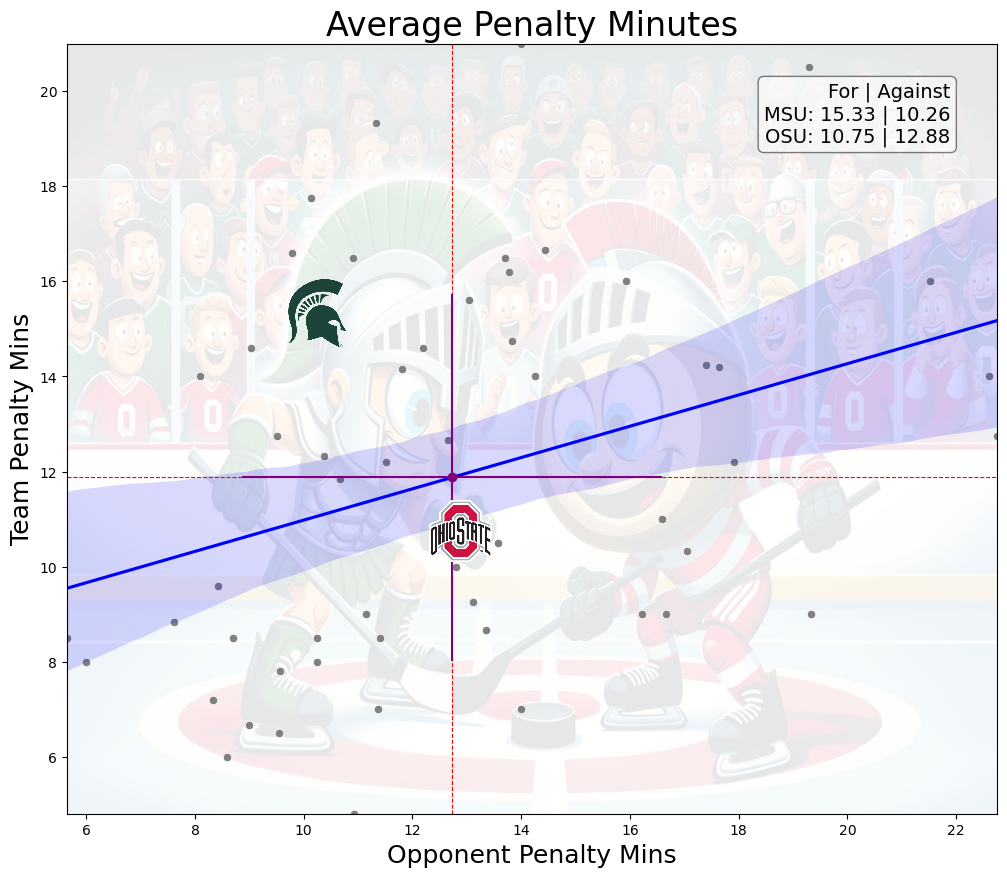

In [95]:
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()

#####################################################
# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)  # Create figure and axis object

# Scatter plot
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey', ax=ax)


# Add Background Image
plt.imshow(bg_img, aspect='auto', extent=[avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].max(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)

# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    plt.scatter(team_data['Avg_Penalty_Minutes_Against'], team_data['Avg_Penalty_Minutes_For'], color=color, s=100, zorder=5, marker='x')


# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f} | {team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# # Create a multi-line summary text
# summary_text = 'Penalty Mins For/Against\n'
# for team, color in team_colors.items():
#     team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
#     summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f}/{team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'

# # Add the cohesive summary box
# plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# Add title and axis labels
plt.title('Average Penalty Minutes', fontsize=24)
plt.xlabel('Opponent Penalty Mins', fontsize=18)
plt.ylabel('Team Penalty Mins', fontsize=18)

# Add logos
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', team_colors, logo_mapping, ax=ax)

plt.show()





## Histogram of When Goals are Scored

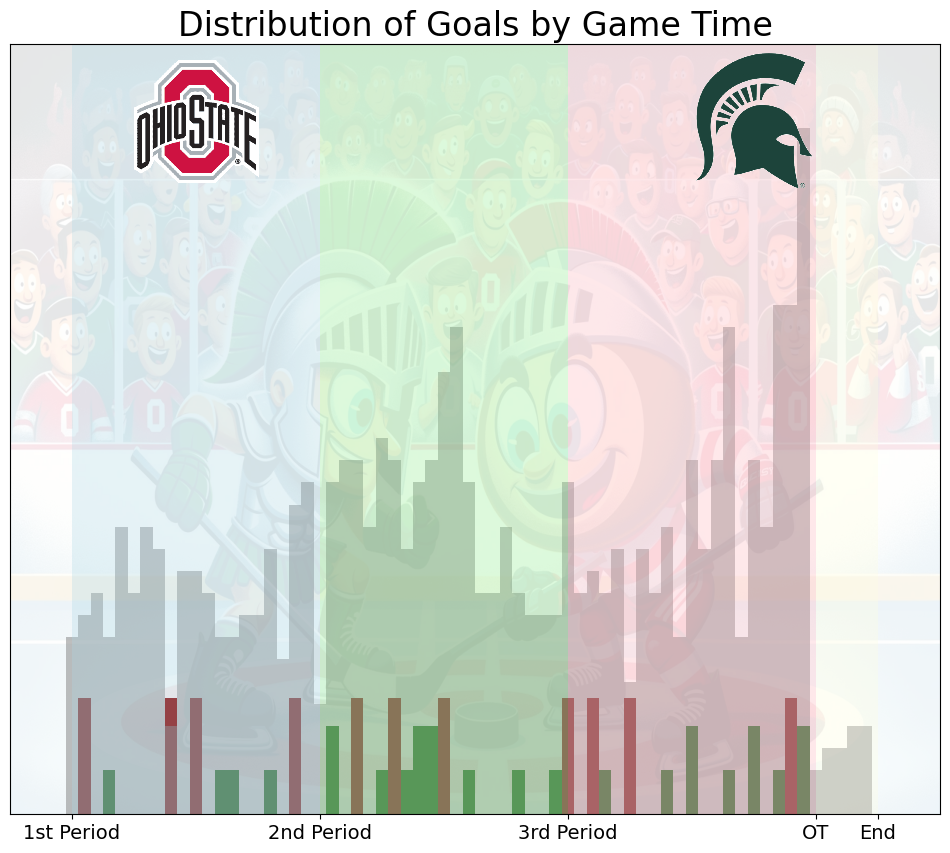

In [99]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_goals_time_data(conn):
    goals_time_query = """
    SELECT Team, Period, Time
    FROM scoring_summary;
    """
    return pd.read_sql(goals_time_query, conn)

def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0

def plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value):
    goals_time_df['Continuous_Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)
    
    fig, ax = plt.subplots(figsize=figure_size)
    ax.imshow(bg_img, aspect='auto', extent=[-5, 70, 0, .6], zorder=0, alpha=alpha_value)

    all_teams_data = goals_time_df['Continuous_Time']
    bin_counts, bin_edges = np.histogram(all_teams_data, bins=range(0, 66))
    bin_avgs = bin_counts / len(np.unique(goals_time_df['Team']))

    # Moved this part below to plot it after the specific teams
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = goals_time_df[goals_time_df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = goals_time_df[goals_time_df['Team'] == team_abrv_mapping[team]]
            
        if not team_data.empty:
            team_bin_counts, _ = np.histogram(team_data['Continuous_Time'], bins=range(0, 66))
            team_bin_avgs = team_bin_counts / len(team_data)  # Normalize by the number of goals by the team
            ax.bar(bin_edges[:-1], team_bin_avgs, width=1, alpha=1, label=f"{team} (Avg)", color=color)
        else:
            print(f"No data found for team {team}")


    ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    

    
    ax.axvspan(0, 20, facecolor='lightblue', alpha=0.3)
    ax.axvspan(20, 40, facecolor='lightgreen', alpha=0.3)
    ax.axvspan(40, 60, facecolor='lightpink', alpha=0.3)
    ax.axvspan(60, 65, facecolor='lightyellow', alpha=0.3)
    
    ax.set_title('Distribution of Goals by Game Time', fontsize=24)
    ax.set_xticks([0, 20, 40, 60, 65])
    ax.set_xticklabels(['1st Period', '2nd Period', '3rd Period', 'OT', 'End'], fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
    
    plt.show()

# Usage
# conn = "your_database_connection_here"
# highlight_colors_shots = {"Team1": "red", "Team2": "blue"}  # Replace with actual team-color mapping
# figure_size = (12, 8)
# bg_img = "your_background_image_here"
# alpha_val = 0.5  # Adjust the alpha value as needed

goals_time_df = fetch_goals_time_data(conn)
plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value)


# Stats by Line and Position Section